In [2]:
# Loading Data and making copy just in case

import pandas as pd

df = pd.read_csv("C:/Users/max dore/Desktop/Data3402 kaggle challenge (churn)/train.csv")
df2 = df.copy()

df2

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [5]:
any_missing = df.isnull().any().any()

print(any_missing)

False


In [ ]:
# Seems to be no missing data

In [7]:
rows, columns = df2.shape

print("# Rows:", rows)
print("# Columns:", columns)


# Rows: 165034
# Columns: 14


In [9]:
# Descriptive Stats

descriptive_stats = df2.describe()

print(descriptive_stats)

                id    CustomerId    CreditScore            Age         Tenure  \
count  165034.0000  1.650340e+05  165034.000000  165034.000000  165034.000000   
mean    82516.5000  1.569201e+07     656.454373      38.125888       5.020353   
std     47641.3565  7.139782e+04      80.103340       8.867205       2.806159   
min         0.0000  1.556570e+07     350.000000      18.000000       0.000000   
25%     41258.2500  1.563314e+07     597.000000      32.000000       3.000000   
50%     82516.5000  1.569017e+07     659.000000      37.000000       5.000000   
75%    123774.7500  1.575682e+07     710.000000      42.000000       7.000000   
max    165033.0000  1.581569e+07     850.000000      92.000000      10.000000   

             Balance  NumOfProducts      HasCrCard  IsActiveMember  \
count  165034.000000  165034.000000  165034.000000   165034.000000   
mean    55478.086689       1.554455       0.753954        0.497770   
std     62817.663278       0.547154       0.430707        0.

In [12]:
# Numerical vs. Categorical features (and Dtypes)

numerical_features = df2.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df2.select_dtypes(include=['object', 'category']).columns

numerical_features_count = len(numerical_features)
categorical_features_count = len(categorical_features)

dtypes = df2.dtypes

print("Numerical Features:", numerical_features_count)
print("Categorical Features:", categorical_features_count)
print("\nData Types:")
print(dtypes)


Numerical Features: 11
Categorical Features: 3

Data Types:
id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object


In [3]:
# DROPPING the "Surname" feature. It is not very relevant to predicting churn. (USED)

df2 = df2.drop(columns=['Surname'])

In [18]:
#Printing Columns

df2.columns


Index(['id', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
#Using IQR to look for outliers

outliers_dict = {}

for column in df2.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df2[(df2[column] < lower_bound) | (df2[column] > upper_bound)]
    outliers_dict[column] = outliers

for column, outlier_data in outliers_dict.items():
    print(f"Outliers in {column} column:")
    print(outlier_data, "\n")


Outliers in id column:
Empty DataFrame
Columns: [id, CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: [] 

Outliers in CustomerId column:
Empty DataFrame
Columns: [id, CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: [] 

Outliers in CreditScore column:
            id  CustomerId  CreditScore Geography  Gender   Age  Tenure  \
35          35    15661591          413   Germany    Male  28.0       3   
169        169    15612494          359    France  Female  44.0       6   
705        705    15597131          415    France    Male  32.0       5   
1161      1161    15711396          427     Spain    Male  39.0       8   
2037      2037    15791533          367     Spain  Female  35.0       6   
...        ...         ...          ...       ...     ...   ...     ...   
162911  162911    15661591          413

In [5]:
#Table for df2

from tabulate import tabulate

def get_type(col):
    if pd.api.types.is_numeric_dtype(col):
        return 'Numerical'
    else:
        return 'Categorical'

def get_values(col):
    if pd.api.types.is_numeric_dtype(col):
        return f"{col.min()} to {col.max()}"
    else:
        return ', '.join(map(str, col.unique()))

def get_outliers_count(col):
    if pd.api.types.is_numeric_dtype(col):
        Q1 = col.quantile(0.25)
        Q3 = col.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return ((col < lower_bound) | (col > upper_bound)).sum()
    else:
        return "N/A"

def get_mean(col):
    if pd.api.types.is_numeric_dtype(col):
        return col.mean()
    else:
        return "N/A"

info_table = pd.DataFrame({
    'Feature': df2.columns,
    'Type': df2.apply(lambda col: get_type(col)),
    'Values/Range': df2.apply(lambda col: get_values(col)),
    'Missing Values': df2.isnull().sum(),
    'Data Type': df2.dtypes,
    'Outliers Count': df2.apply(lambda col: get_outliers_count(col)),
    'Mean': df2.apply(lambda col: get_mean(col))
})

print(tabulate(info_table, headers='keys', tablefmt='pipe', showindex=False))


| Feature         | Type        | Values/Range           |   Missing Values | Data Type   | Outliers Count   | Mean                |
|:----------------|:------------|:-----------------------|-----------------:|:------------|:-----------------|:--------------------|
| id              | Numerical   | 0 to 165033            |                0 | int64       | 0                | 82516.5             |
| CustomerId      | Numerical   | 15565701 to 15815690   |                0 | int64       | 0                | 15692005.019026382  |
| CreditScore     | Numerical   | 350 to 850             |                0 | int64       | 253              | 656.454373038283    |
| Geography       | Categorical | France, Spain, Germany |                0 | object      | N/A              | N/A                 |
| Gender          | Categorical | Male, Female           |                0 | object      | N/A              | N/A                 |
| Age             | Numerical   | 18.0 to 92.0           |           

Exited
0    130113
1     34921
Name: count, dtype: int64


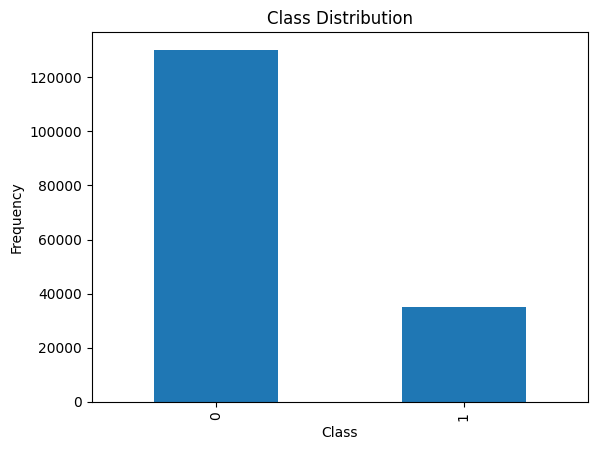

In [7]:
#Detecting Class Imbalance

import matplotlib.pyplot as plt

class_distribution = df2['Exited'].value_counts()

print(class_distribution)

class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()



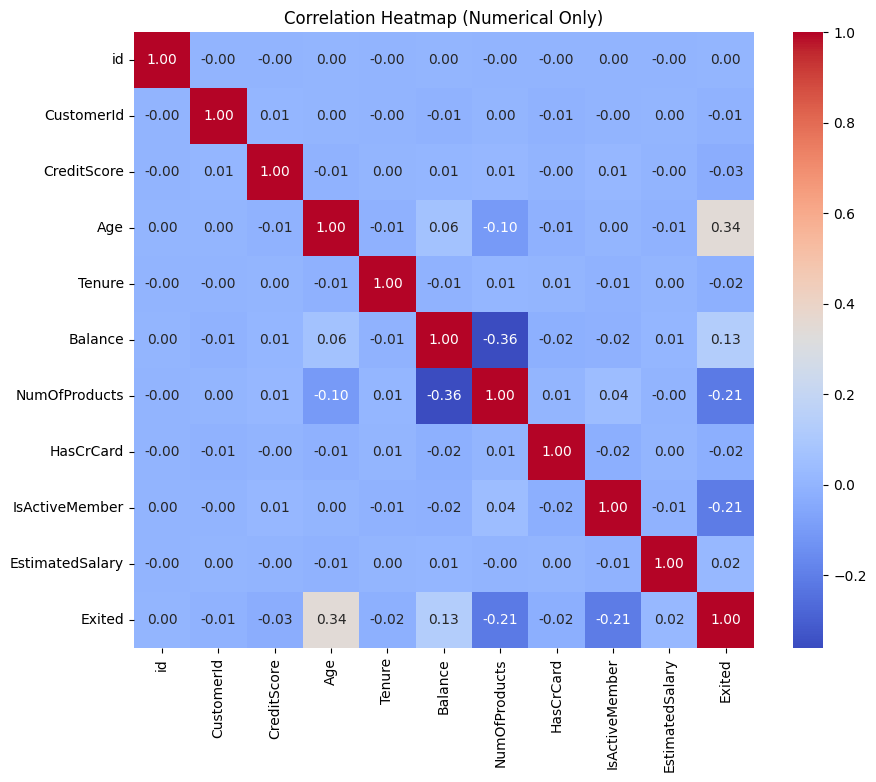

In [10]:
#CORR heatmap

import seaborn as sns

numerical_df2 = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numerical_df2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap (Numerical Only)')
plt.show()


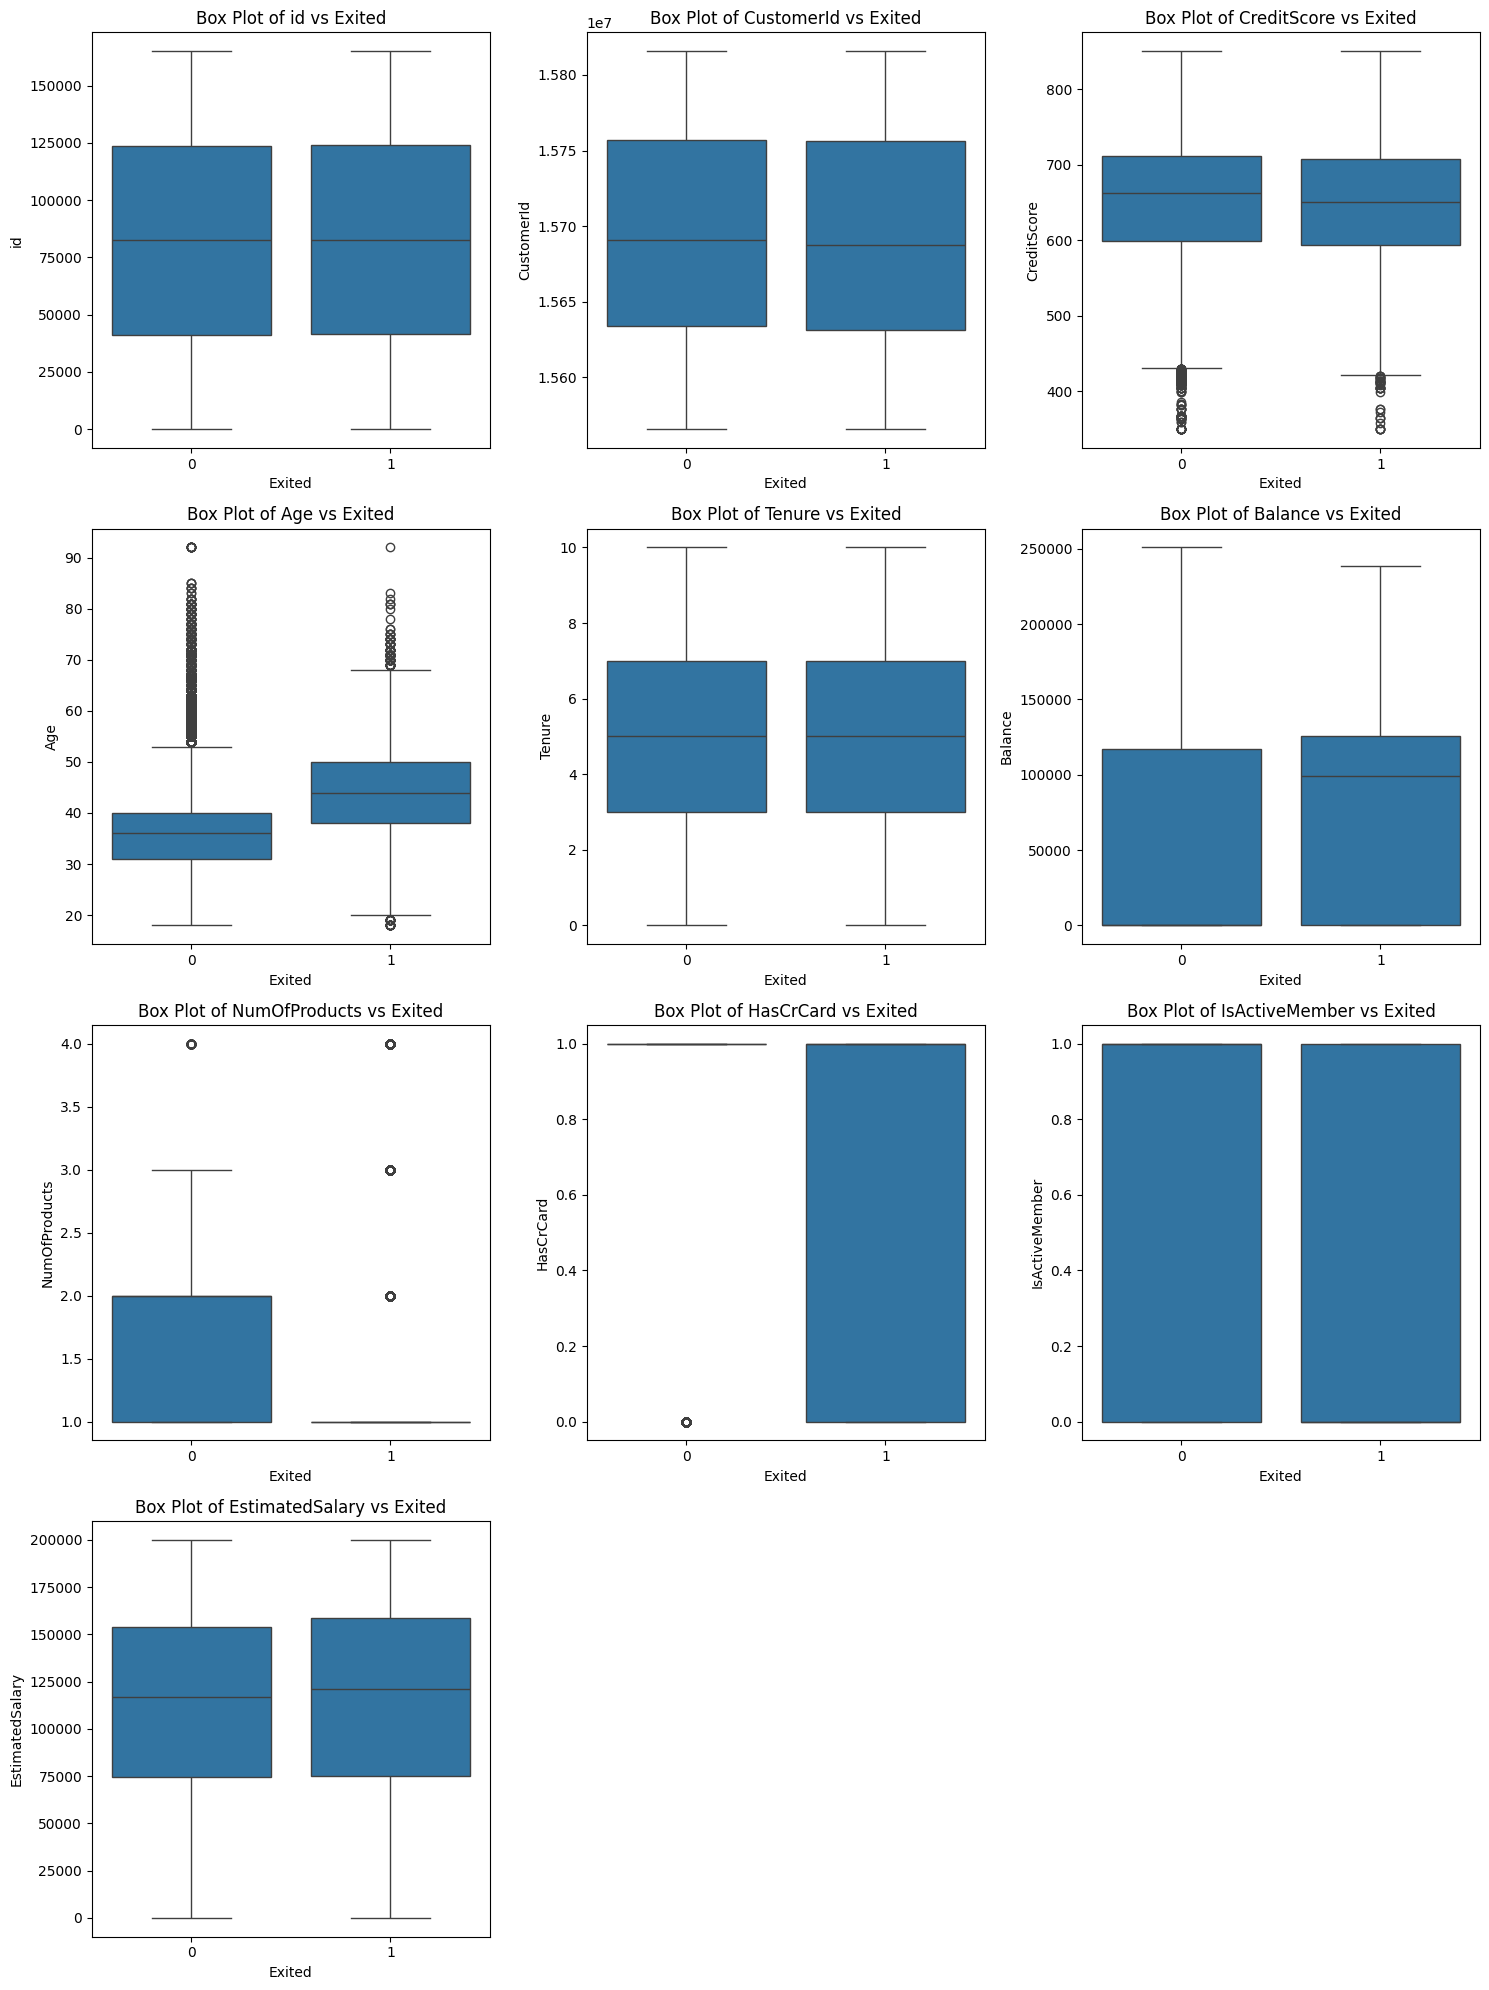

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df2.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col != 'Exited']  # Exclude 'Exited'

num_plots = len(numerical_cols)
cols = 3
rows = (num_plots + cols - 1) // cols

plt.figure(figsize=(15, rows * 5)) 

for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x=df2['Exited'], y=df2[col])
    plt.title(f'Box Plot of {col} vs Exited')
    plt.xlabel('Exited')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


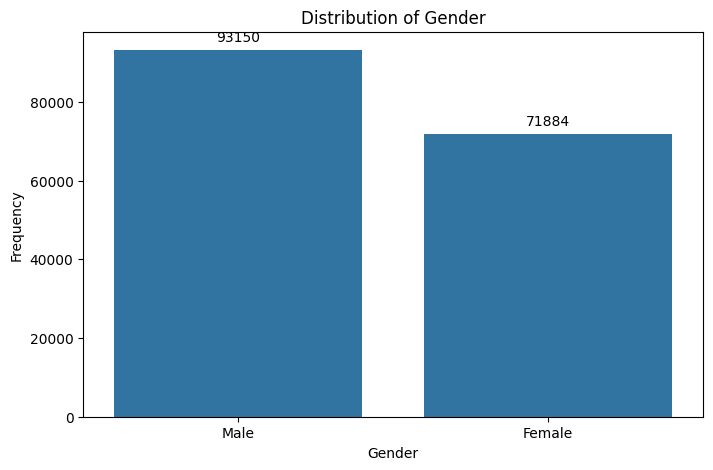

In [14]:
# Bar Graph for Gender

gender_counts = df2['Gender'].value_counts()

plt.figure(figsize=(8, 5))

barplot = sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

# Adding the number above each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')
plt.show()



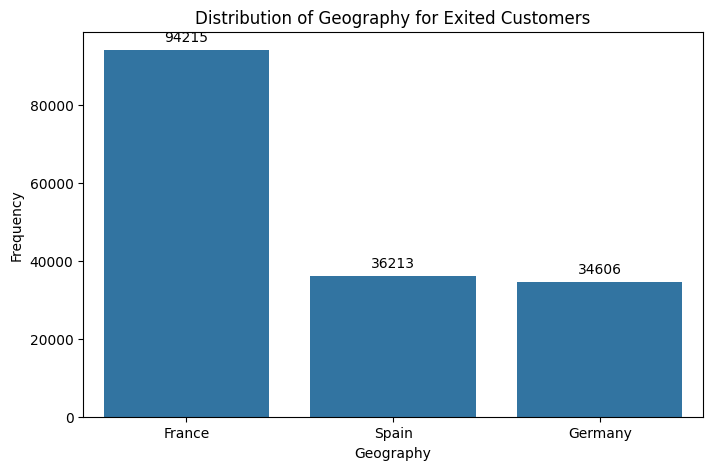

In [17]:
#Bar Graph for Geography

geography_counts = df2['Geography'].value_counts()

plt.figure(figsize=(8, 5))
barplot_2 = sns.barplot(x=geography_counts.index, y=geography_counts.values)
plt.title('Distribution of Geography for Exited Customers')
plt.xlabel('Geography')
plt.ylabel('Frequency')

for p in barplot_2.patches:
    barplot_2.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.show()


In [15]:
import pandas as pd

contingency_table = pd.crosstab(df2['Gender'], df2['Exited'])
print(contingency_table)


Exited      0      1
Gender              
Female  51779  20105
Male    78334  14816


Based on the data and visualizations, it seems age would be the most promising predictor, however there is generally very little correlation b/t the input variables and the target variable in the first place. 

Heavy class imbalance may need to be taken care of

In [ ]:
# Separate classifications when doing data understanding
# mitigate class imbalance
# Dont use seaborn for plotting hist
